In [1]:
import os
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

# check duplicates data

In [3]:
titanic_train.duplicated().sum()

0

In [4]:
titanic_test.duplicated().sum()

0

In [5]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
print(titanic_train.shape, titanic_test.shape)

(891, 12) (418, 11)


In [8]:
titanic_train['data'] = 'train'
titanic_test['data'] = 'test'

In [9]:
print(titanic_train.shape, titanic_test.shape)

(891, 13) (418, 12)


In [10]:
all_data = pd.concat([titanic_train, titanic_test], axis=0)

In [11]:
all_data.shape

(1309, 13)

In [12]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [13]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [14]:
# Data Pre-processing part
# part 1 - missing value
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [15]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [16]:
# Drop required from the dataset - Cabin, PassengerId,Name, Ticket, Fare

all_data = all_data.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)

In [17]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,male,22.0,1,0,S,train
1,1.0,1,female,38.0,1,0,C,train
2,1.0,3,female,26.0,0,0,S,train
3,1.0,1,female,35.0,1,0,S,train
4,0.0,3,male,35.0,0,0,S,train


In [18]:
all_data.isnull().any()

Survived     True
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Embarked     True
data        False
dtype: bool

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [20]:
all_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027
std,0.486592,0.837836,14.413493,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


<Axes: ylabel='Age'>

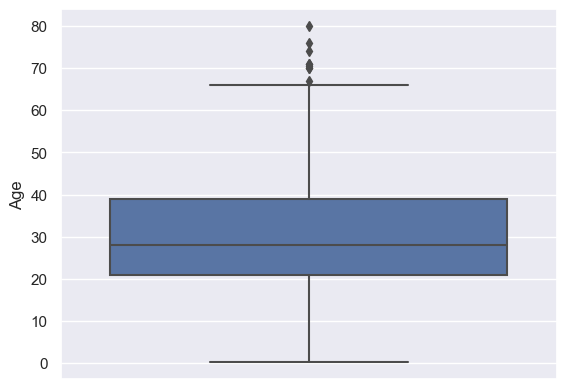

In [21]:
sns.boxplot(y='Age', data=all_data)

In [22]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [23]:
# Embarked
all_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [24]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [25]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      0
data          0
dtype: int64

In [26]:
# check all unique values
for i in all_data.columns:
    print("*******************************************",i,
         "***************************************************")
    print()
    print(set(all_data[i].tolist()))
    print()

******************************************* Survived ***************************************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [27]:
# Pre-processing part 2 - Encoding 
# Pclass, Sex, Embarked
print(all_data['Pclass'].value_counts())
print()
print(all_data['Sex'].value_counts())
print()
print(all_data['Embarked'].value_counts())

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

Sex
male      843
female    466
Name: count, dtype: int64

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64


In [28]:
# Label encoder
all_data['Sex'] = all_data['Sex'].astype('category')
all_data['Sex'] = all_data['Sex'].cat.codes
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,1,22.0,1,0,S,train
1,1.0,1,0,38.0,1,0,C,train
2,1.0,3,0,26.0,0,0,S,train
3,1.0,1,0,35.0,1,0,S,train
4,0.0,3,1,35.0,0,0,S,train


In [29]:
# One Hot Encoder
all_data = pd.get_dummies(all_data, columns=['Pclass', 'Embarked'])

In [30]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,False,False,True,False,False,True
1,1.0,0,38.0,1,0,train,True,False,False,True,False,False
2,1.0,0,26.0,0,0,train,False,False,True,False,False,True
3,1.0,0,35.0,1,0,train,True,False,False,False,False,True
4,0.0,1,35.0,0,0,train,False,False,True,False,False,True


In [31]:
# dummy variable (n-1)
all_data = all_data.drop(['Pclass_1','Embarked_C'], axis=1)

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Sex         1309 non-null   int8   
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   data        1309 non-null   object 
 6   Pclass_2    1309 non-null   bool   
 7   Pclass_3    1309 non-null   bool   
 8   Embarked_Q  1309 non-null   bool   
 9   Embarked_S  1309 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(1), object(1)
memory usage: 67.8+ KB


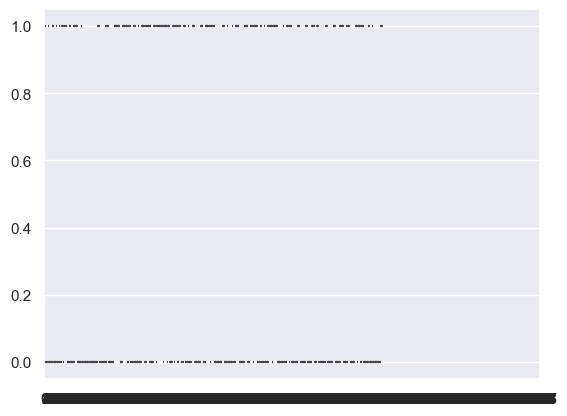

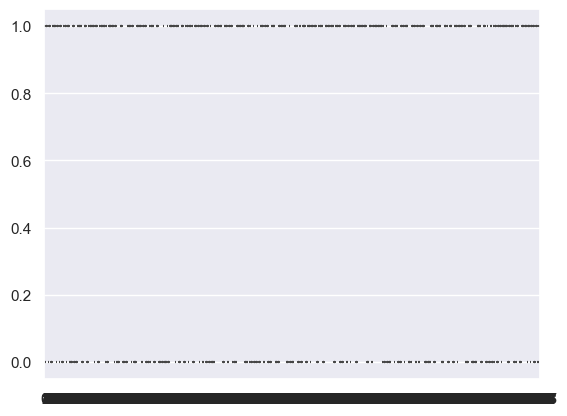

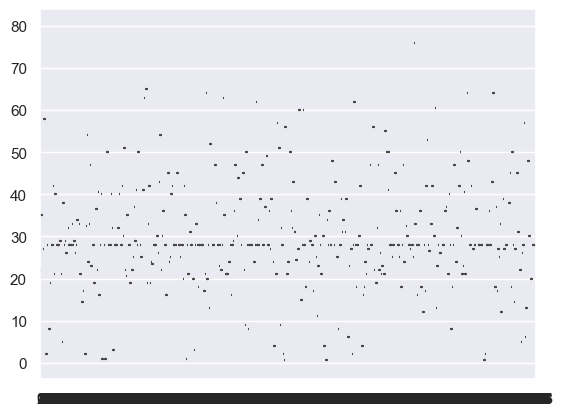

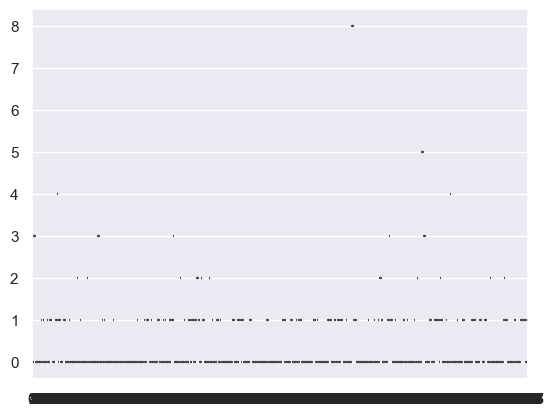

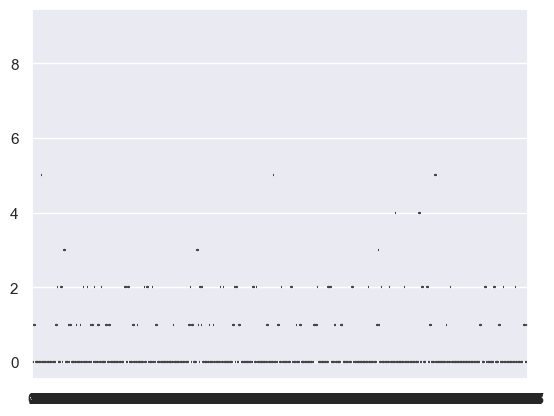

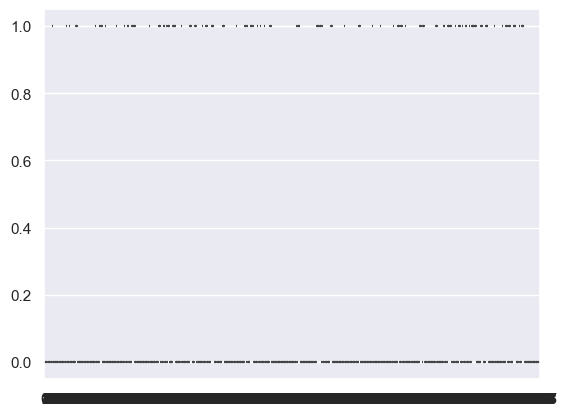

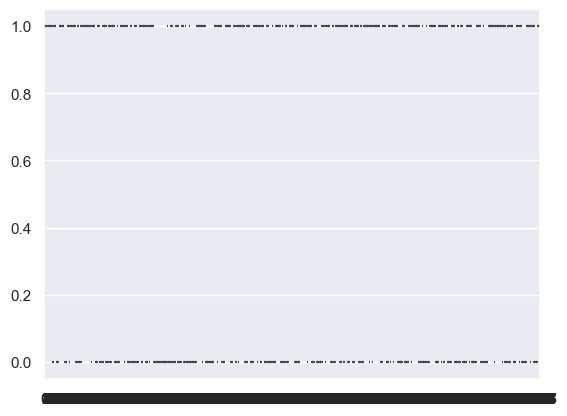

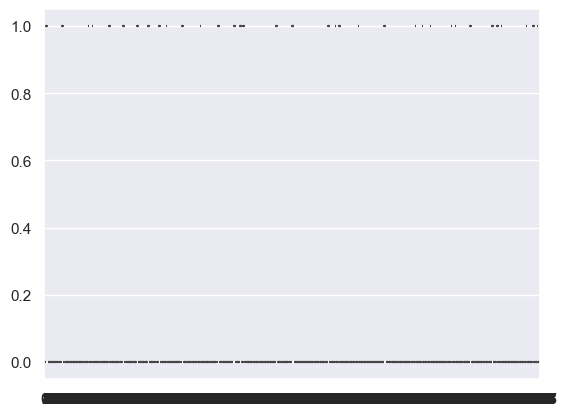

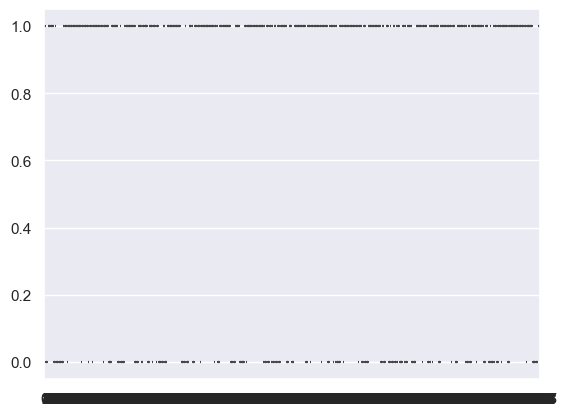

In [33]:
# preprocessing part 3 - outlier treatement 
# please note, outlier treatement is not required in this case
def boxplots(col):
    sns.boxplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [34]:
# preprocessing part 4 - not required 
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,train,False,True,False,True
1,1.0,0,38.0,1,0,train,False,False,False,False
2,1.0,0,26.0,0,0,train,False,True,False,True
3,1.0,0,35.0,1,0,train,False,False,False,True
4,0.0,1,35.0,0,0,train,False,True,False,True


Axes(0.125,0.11;0.775x0.77)


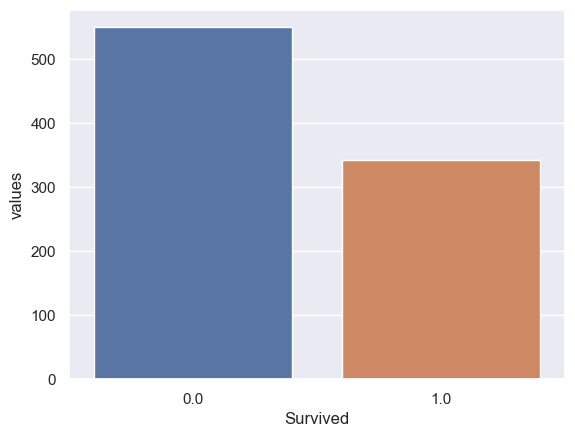

In [35]:
# preprocessing part 5 - imbalance checks
temp = all_data['Survived'].value_counts()
temp_df = pd.DataFrame({'Survived': temp.index, 'values': temp.values})
print(sns.barplot(x='Survived', y = 'values', data=temp_df))
plt.show()

In [36]:
all_data['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

# preprocessing part completed

# EDA - Exploratory data anaysis

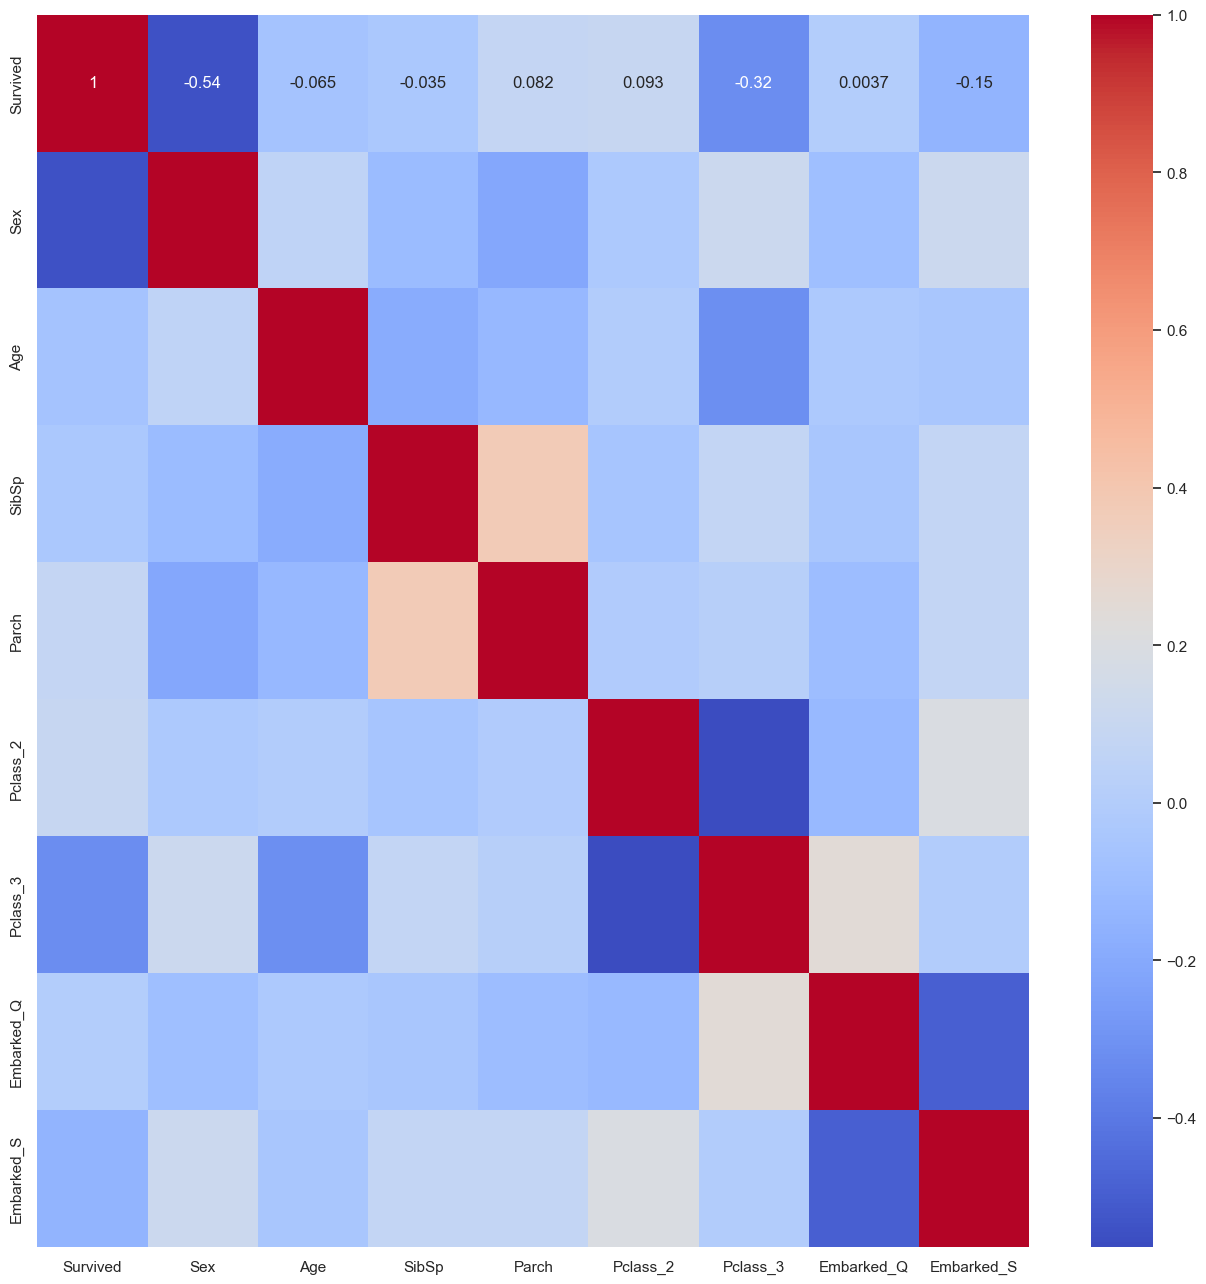

In [44]:
plt.figure(figsize=(16,16))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [46]:
import dtale
import dtale.app as dtale_app

In [48]:
dtale.show(all_data)

## We have to segregate train and test seperately for model building and prediction
